# Drill: Present Same Data Multiple Ways

Dataset from [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects/data)

In [58]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("ks-projects-201801.csv")
df = df.head(1500)

## Plot 1 variable ('main_category') 4 different ways.

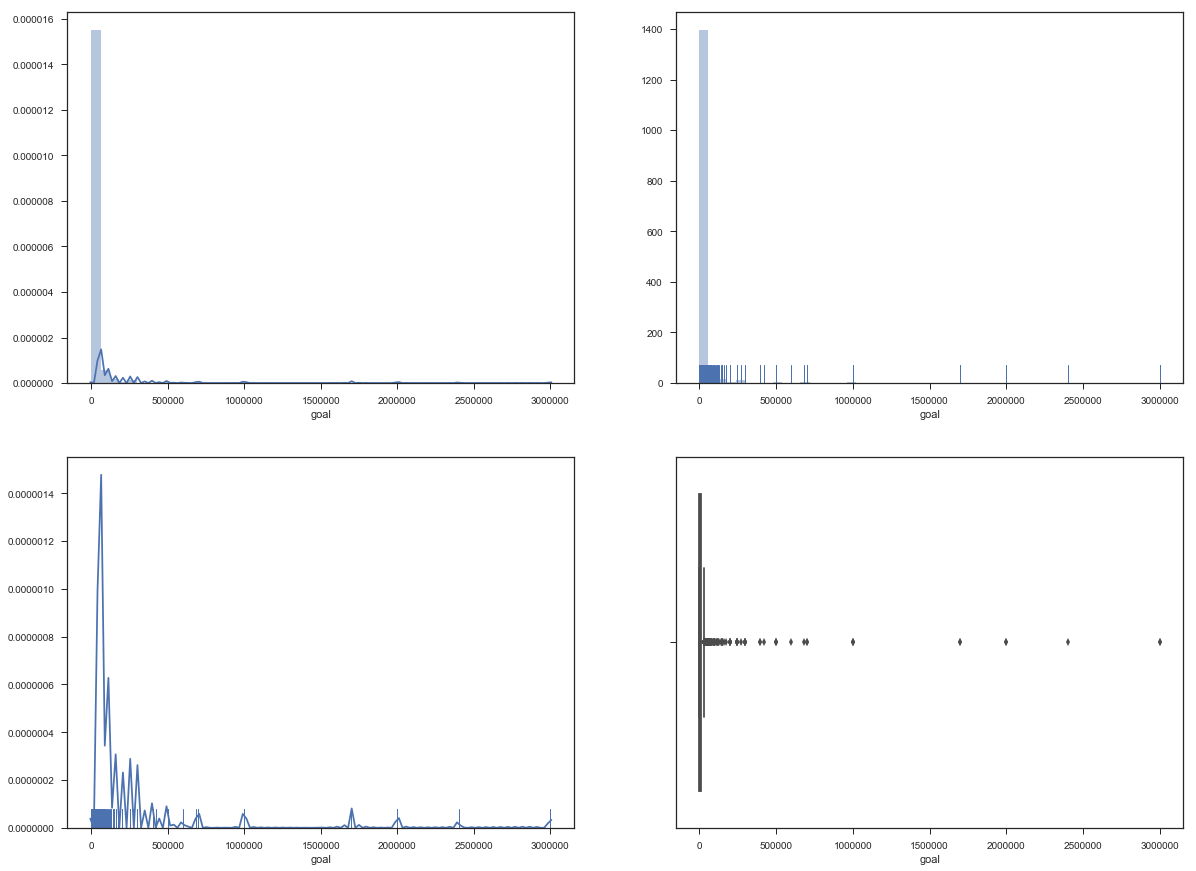

In [60]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.distplot(df['goal'])

plt.subplot(2, 2, 2)
sns.distplot(df['goal'], kde=False, rug=True)

plt.subplot(2, 2, 3)
sns.distplot(df['goal'], hist=False, rug=True)

plt.subplot(2, 2, 4)
sns.boxplot(x=df['goal'])

plt.show()

The data's outliers make it difficult to gain any meaningful insight from the graphs. **The graphs directly below (and in the rest of this report) will display only data entries with a `goal` < $50,000** – this narrowed scope makes it easier to decipher meaningful patterns in the data.

- Histogram shows the distribution of Kickstarter projects with different goal amounts. 
- Added rugplot on top of histogram – essentially shows the same information as a histogram in a different way visually (plots where the datapoints are concentrated along the goal axis ()
- Added KDE (kernel density estimate) on top of joint histogram-rugplot – also similar to histogram, but takes into account that goal amount is a continuous variable and enables us to make estimates for goal values that are not explicitly included in a histogram bin
- Boxplot shows the distribution of Kickstarter projects with different goal amounts using quartiles to determine where the median, different quartiles, and outliers of the data are

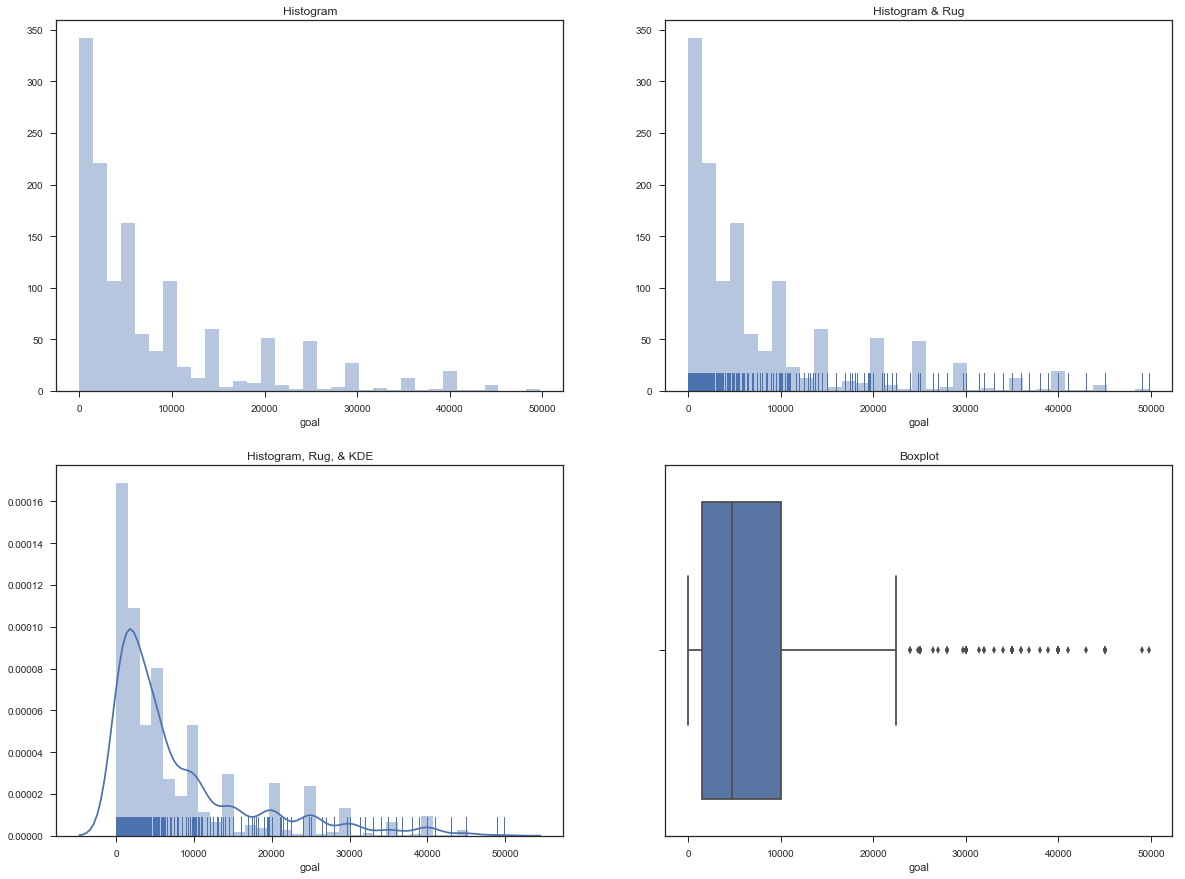

In [61]:
# Remove outliers – goals over $50,000
df_without_goals_outliers = df[df['goal'] < 50000 ]

plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
plt.title('Histogram')
sns.distplot(df_without_goals_outliers['goal'], kde=False)

plt.subplot(2, 2, 2)
plt.title('Histogram & Rug')
sns.distplot(df_without_goals_outliers['goal'], kde=False, rug=True)

plt.subplot(2, 2, 3)
plt.title('Histogram, Rug, & KDE')
sns.distplot(df_without_goals_outliers['goal'], rug=True)

plt.subplot(2, 2, 4)
plt.title('Boxplot')
sns.boxplot(x=df_without_goals_outliers['goal'])

plt.show()

## Choose 2 continuous variables ('goal' and 'usd_goal_real'), and plot them 4 different ways.

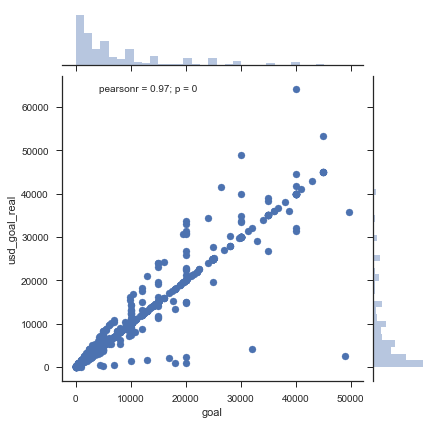

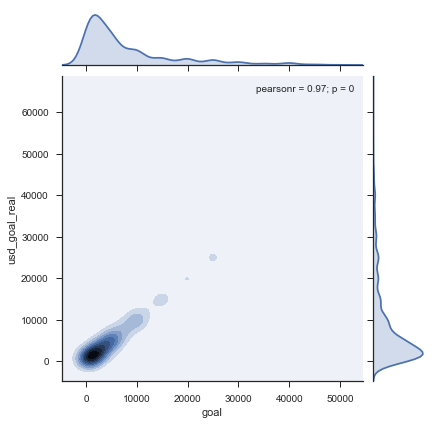

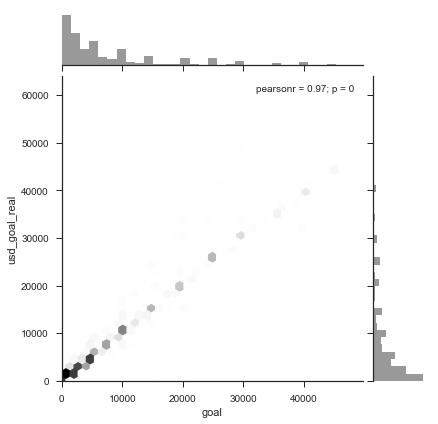

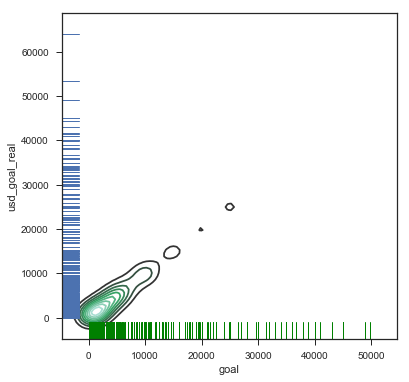

In [62]:
sns.jointplot(x="goal", y="usd_goal_real", data=df_without_goals_outliers)

sns.jointplot(x="goal", y="usd_goal_real", data=df_without_goals_outliers, kind="kde")

sns.jointplot(x=df_without_goals_outliers['goal'], y=df_without_goals_outliers['usd_goal_real'], kind="hex", color="k");

f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df_without_goals_outliers['goal'], df_without_goals_outliers['usd_goal_real'], ax=ax)
sns.rugplot(df_without_goals_outliers['goal'], color="g", ax=ax)
sns.rugplot(df_without_goals_outliers['usd_goal_real'], vertical=True, ax=ax);

plt.show()

## Choose 1 continuous variable ('goal') and 1 categorical variable ('main_category') , and plot them 6 different ways. 

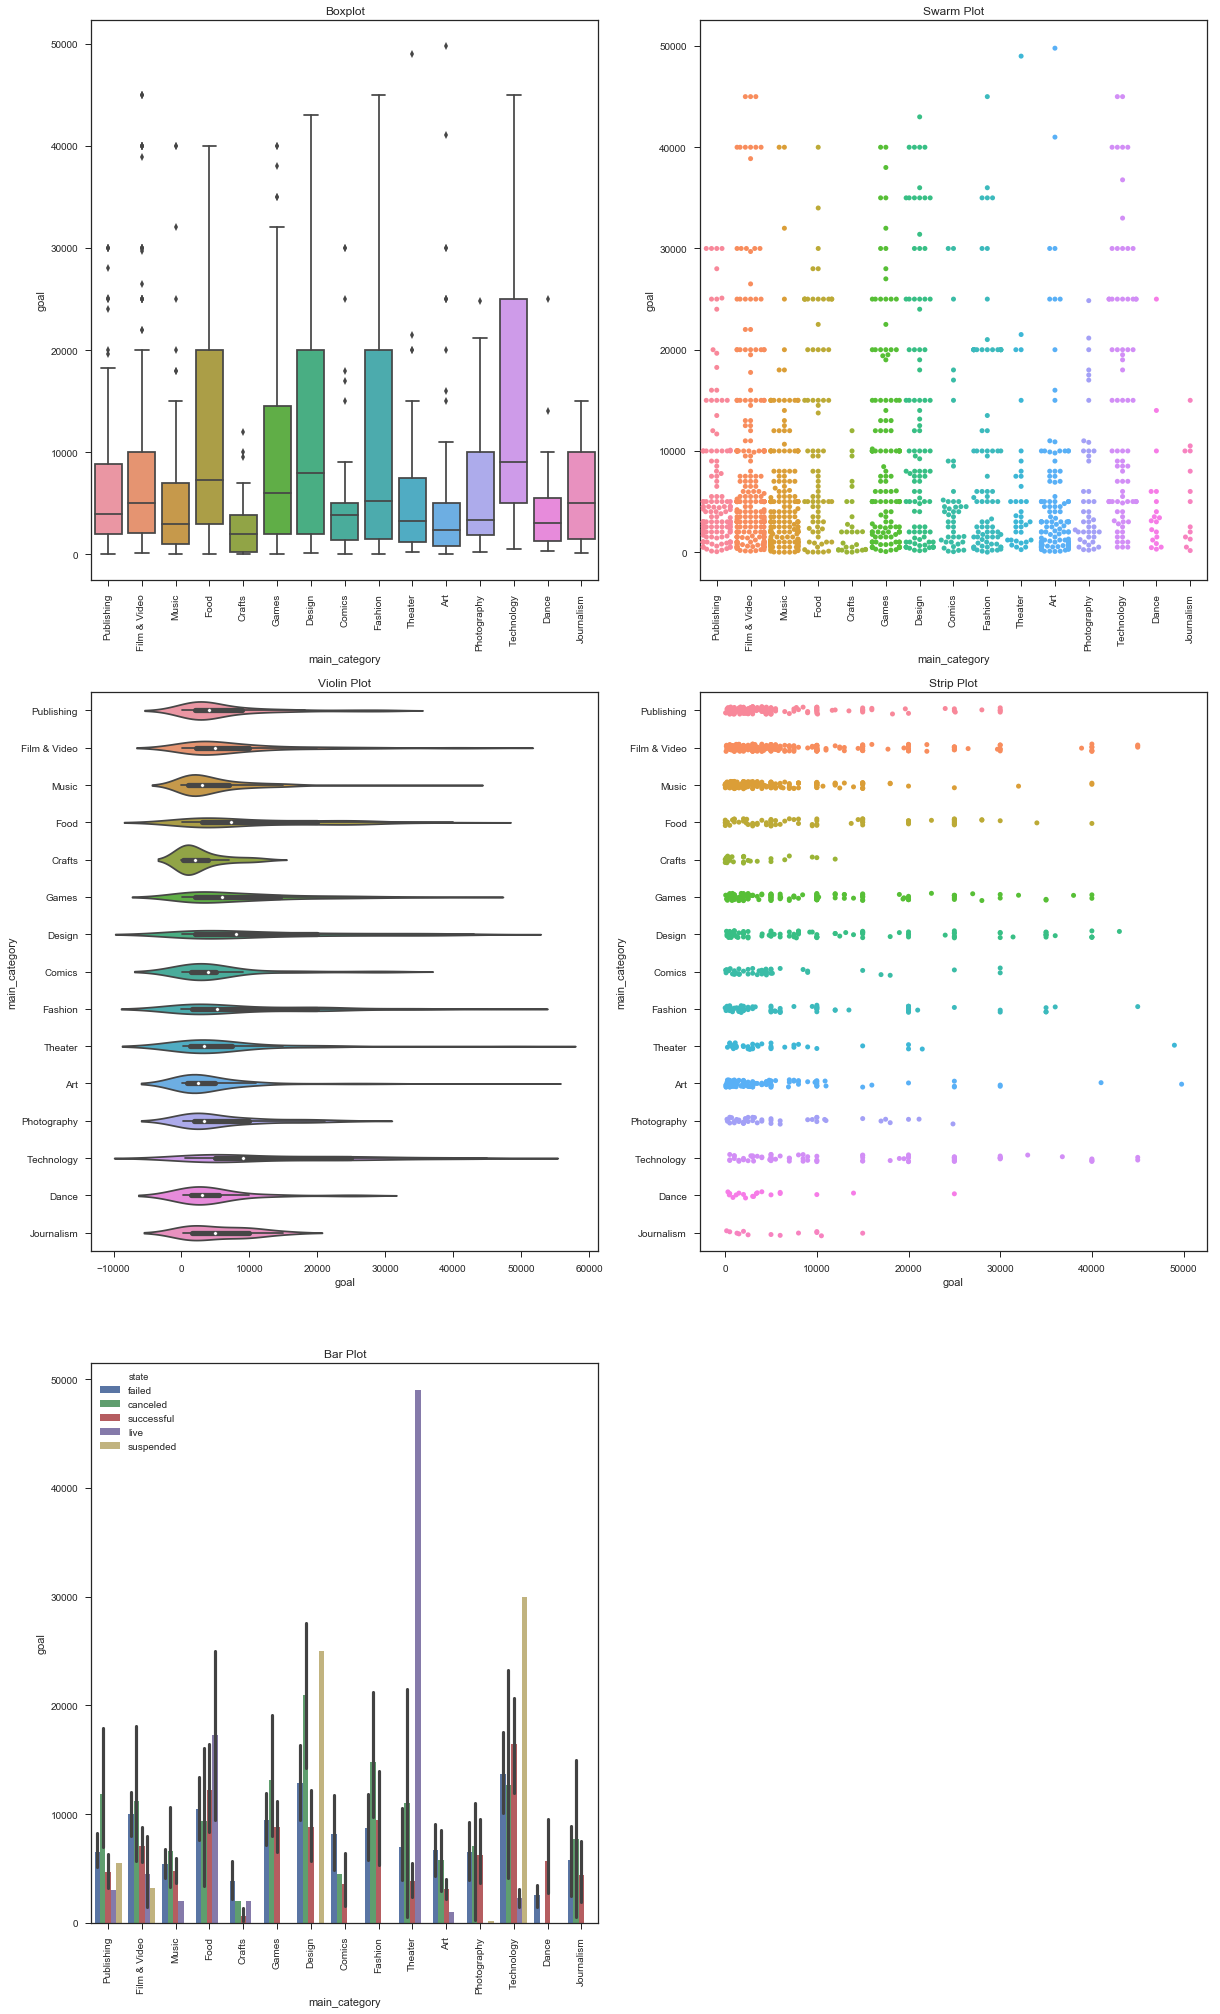

In [63]:
df_without_goals_outliers = df_without_goals_outliers[df_without_goals_outliers['state'] != 'undefined']

figure = plt.figure(figsize=(20,35))

figure.add_subplot(3, 2, 1)
plt.title('Boxplot')
plt.xticks(rotation=90)
sns.boxplot(x="main_category", y="goal", data=df_without_goals_outliers, dodge=False)

figure.add_subplot(3, 2, 2)
plt.xticks(rotation=90)
plt.title('Swarm Plot')
sns.swarmplot(x="main_category", y="goal", data=df_without_goals_outliers)

figure.add_subplot(3, 2, 3)
plt.title('Violin Plot')
sns.violinplot(x="goal", y="main_category", data=df_without_goals_outliers)

figure.add_subplot(3, 2, 4)
plt.title('Strip Plot')
sns.stripplot(x="goal", y="main_category", data=df_without_goals_outliers, jitter=True)

figure.add_subplot(3, 2, 5)
plt.title('Bar Plot')
plt.xticks(rotation=90)
sns.barplot(x="main_category", y="goal", hue="state", data=df_without_goals_outliers)

plt.show()

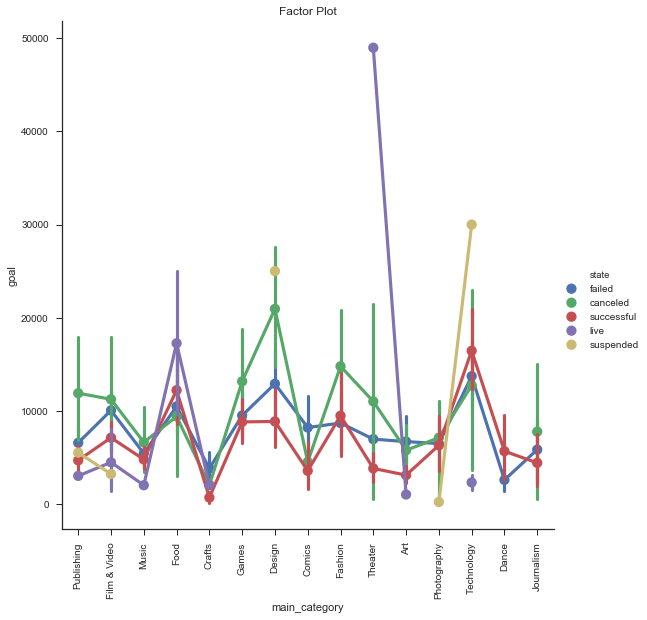

In [64]:
sns.set(style="ticks")
g = sns.factorplot(x="main_category", y="goal", hue="state", size=8, data=df_without_goals_outliers)
g.set_xticklabels(rotation=90)
plt.title('Factor Plot')

plt.show()

## Challenge
As an optional challenge, find a dataset with at least 4 continuous variables and 1 categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups
- Accompany your plot with a written description of what you see.